In [1]:
# Show cell execution time
%load_ext autotime

In [2]:
import logging
logging.basicConfig(filename='/var/panoptes/logs/pipeline.log', level=logging.INFO)
logger = logging.getLogger('piaa')
logger.setLevel(logging.DEBUG)

time: 1.73 ms


In [11]:
import os
import numpy as np
from glob import glob
from astropy.io import fits

from matplotlib import pyplot as plt

from astropy.stats import sigma_clipped_stats, sigma_clip
from ccdproc import ImageFileCollection

from piaa.utils import helpers

time: 1.7 ms


In [124]:
# Get flat fields for both cameras
flat_files = sorted(glob(os.path.join(
    os.environ['PANDIR'],
    'images', 'flats',
    '*.fz'
)))


fits_file = '/var/panoptes/images/temp/PAN012/20180822T035809/20180822T041435.fits'

ext = 1

time: 3.3 ms


In [92]:
exptimes = np.array([fits.getval(fn, 'EXPTIME', ext=ext) for fn in flat_files])

time: 219 ms


In [93]:
exptimes

array([ 0.9,  0.9,  1.9,  1.9,  2.9,  2.9,  3.9,  4.9,  5.9,  0.9,  8.9,
       10.9, 13.9, 17.9, 23.9, 31.9, 42.9,  0.9,  1.9,  1.9,  1.9,  2.9,
        2.9,  3.9,  4.9,  5.9,  0.9,  9.9, 12. , 15. , 19. , 25. , 34. ,
       46. ])

time: 3.62 ms


In [102]:
d0 = helpers.get_rgb_data(fits.getdata(flat_files[7]).astype(np.int16)) - 2048
d1 = helpers.get_rgb_data(fits.getdata(flat_files[1]).astype(np.int16)) - 2048

time: 2.74 s


In [125]:
from scipy import fftpack

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

time: 1.6 ms


In [118]:
im_fft = fftpack.fft2(d0[2])

/home/wtylergee/miniconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


time: 2.89 s


In [126]:
c0 = helpers.get_rgb_data(fits.getdata(fits_file).astype(np.int16)) - 2048

time: 1.32 s


In [132]:
im_fft = fftpack.fft2(c0[1])

/home/wtylergee/miniconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


time: 2.9 s


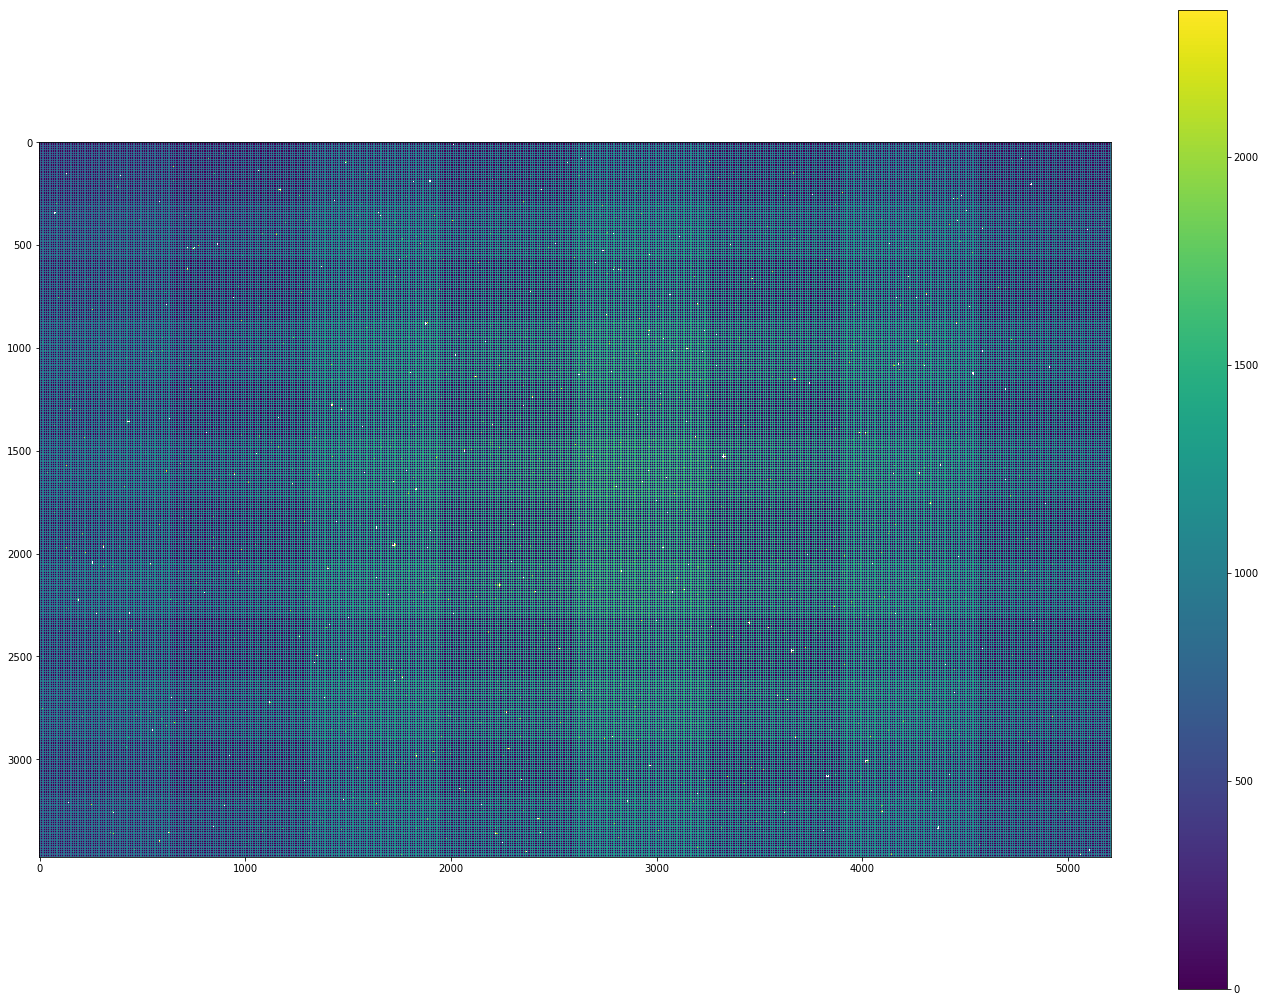

time: 13.6 s


In [128]:
plt.figure(figsize=(24, 18))
plt.imshow(sigma_clip(c0[0].filled(0) + c0[1].filled(0) + c0[2].filled(0)))
plt.colorbar()

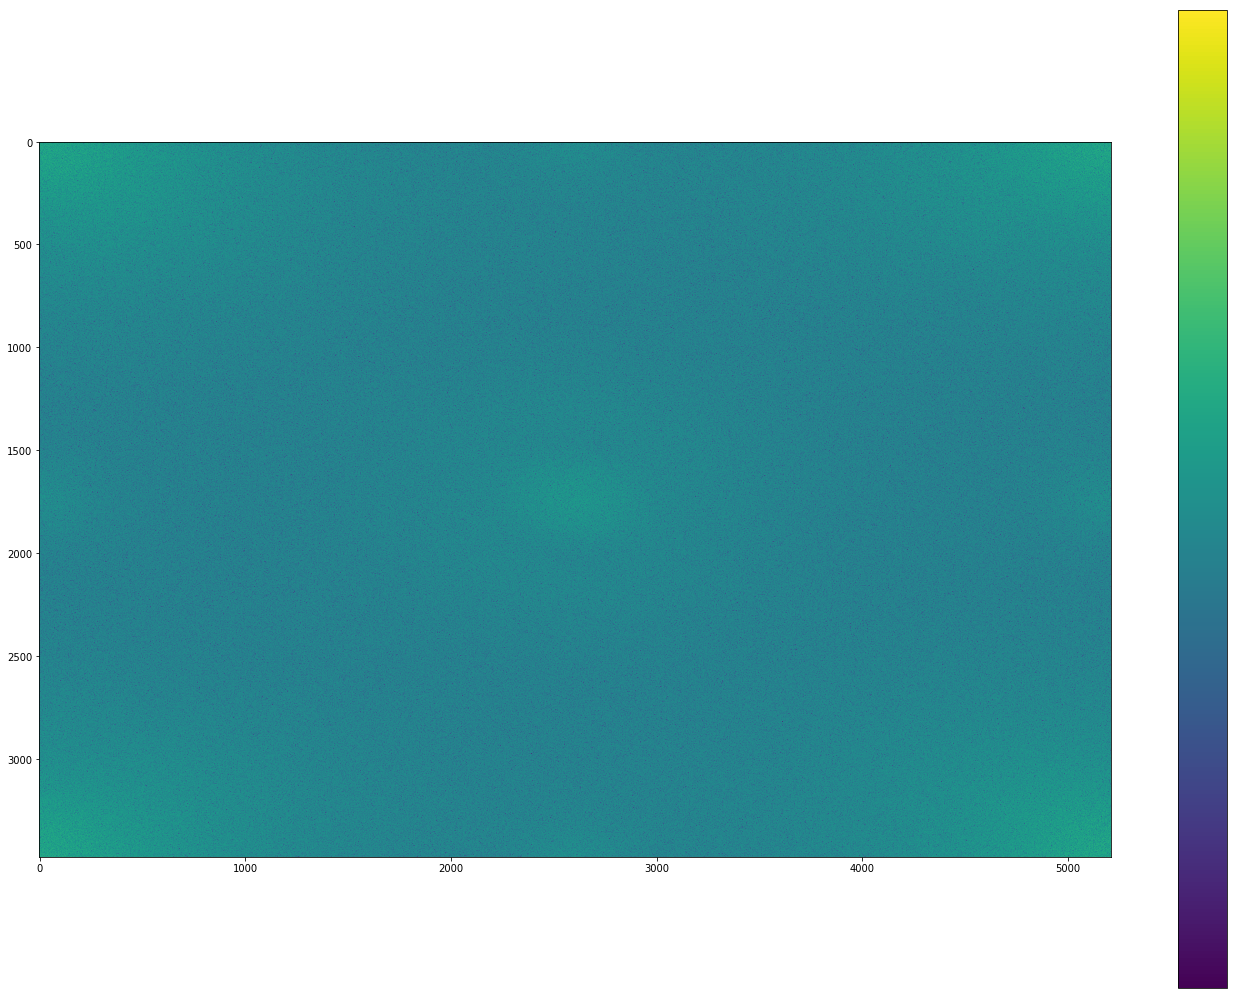

time: 4.08 s


In [133]:
plt.figure(figsize=(24, 18))
plot_spectrum(im_fft)

In [75]:
d2 = sigma_clip((d0 + d1).reshape(3, -1))

time: 32.9 s


In [76]:
color_means = (d2.mean(axis=1) / 2)
color_means

masked_array(data=[3589.9584752986907, 7958.9489722371, 8386.817975885555],
             mask=[False, False, False],
       fill_value=1e+20)

time: 389 ms


In [77]:
d3 = sigma_clip((d0 - d1).reshape(3, -1))

time: 33.4 s


In [78]:
color_std = d3.std(axis=1) / np.sqrt(2)
color_std

masked_array(data=[772.2412589184717, 380.31262163120965,
                   430.67314231206507],
             mask=[False, False, False],
       fill_value=1e+20)

time: 1.88 s


In [79]:
color_std**2

masked_array(data=[596356.56197599, 144637.690172  , 185479.35550895],
             mask=False,
       fill_value=1e+20)

time: 5.13 ms


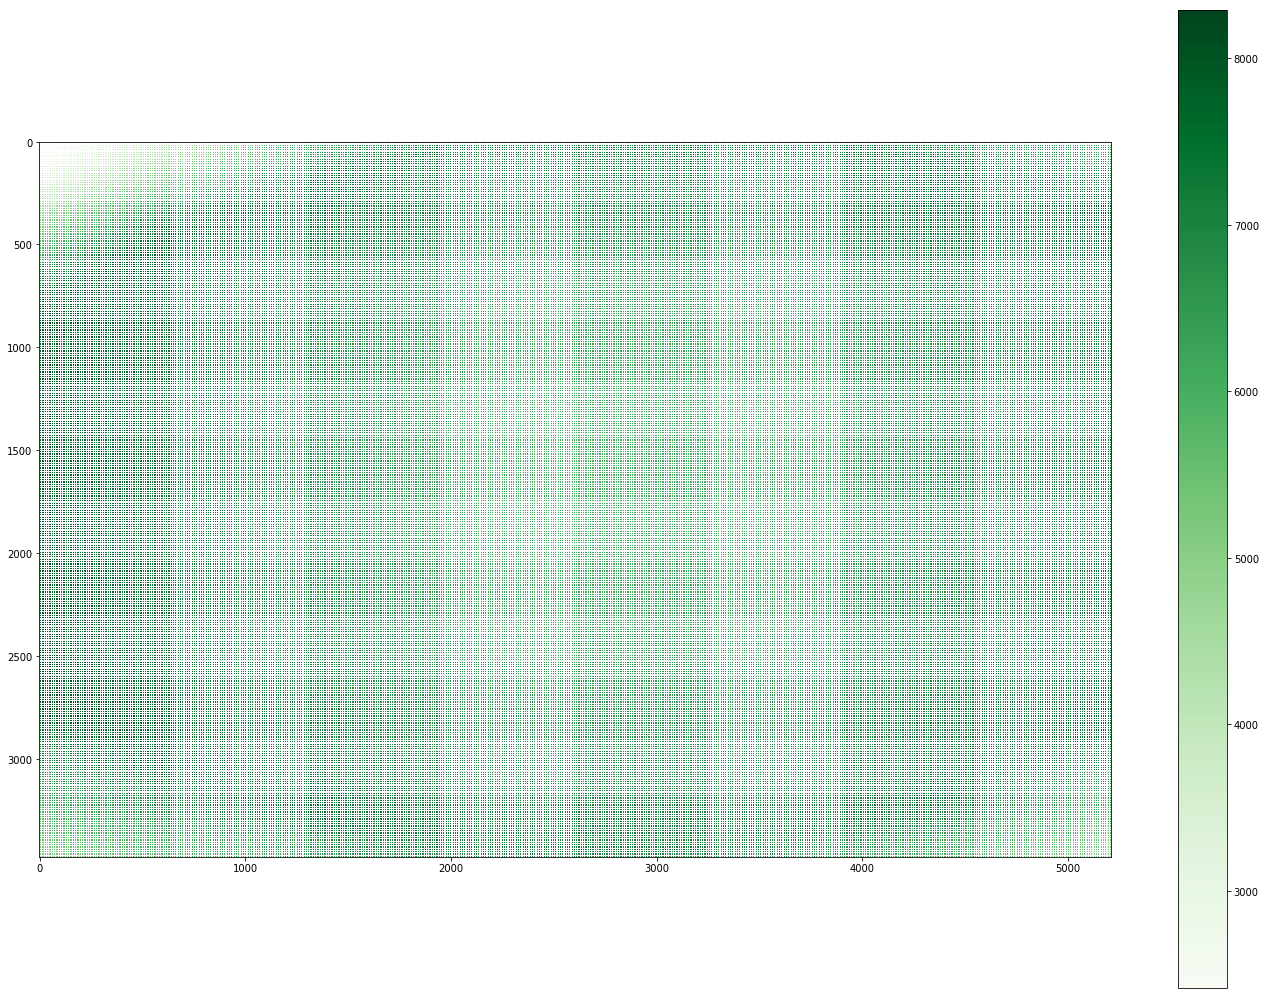

time: 2.45 s


In [85]:
plt.figure(figsize=(24, 18))
plt.imshow(d3[1].reshape(d0.shape[1], d0.shape[2]), cmap='Greens')
plt.colorbar()

(array([  1515.,   1521.,   1688.,   1655.,   1618.,   1788.,   1828.,
          1788.,   1870.,   1838.,   1970.,   2001.,   2099.,   2078.,
          2188.,   2215.,   2173.,   2275.,   2418.,   2462.,   2575.,
          2644.,   2674.,   2878.,   3212.,   3506.,   3801.,   4134.,
          4421.,   4855.,   5520.,   5909.,   6294.,   6862.,   7434.,
          8257.,   8856.,   9728.,  10826.,  11733.,  12867.,  13614.,
         14738.,  15872.,  17071.,  18334.,  19875.,  22861.,  28086.,
         37192.,  50491.,  62990.,  75119.,  86901.,  97012., 106358.,
        113308., 119264., 124614., 130610., 138981., 142409., 147502.,
        153386., 157242., 161307., 164949., 169129., 172131., 174650.,
        177959., 172331., 167754., 161042., 153618., 144258., 133657.,
        122184., 111439., 100577.,  91902.,  82653.,  77044.,  74121.,
         71932.,  69711.,  67436.,  66300.,  65155.,  63839.,  63988.,
         61105.,  59546.,  57658.,  54571.,  51168.,  48012.,  45837.,
      

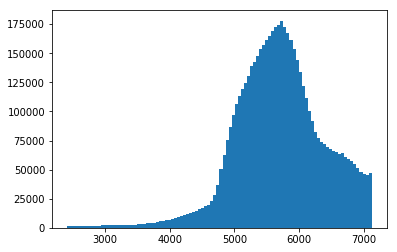

time: 735 ms


In [89]:
plt.hist(d3[2], bins=100)